In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
def plot_curves(acclist, subplot, title, botlim = 0, toplim = 1,ylabel="Accuracy"):
    subplot.set_xlabel('Round', fontsize=14)
    subplot.text(.5,.01, title, horizontalalignment='center', verticalalignment='bottom', fontsize=20, transform=subplot.transAxes)
    subplot.set_ylabel(ylabel, fontsize=14)
    subplot.set_ylim(bottom=botlim,top= toplim)
    for al in acclist:
        eporange = np.arange(len(list(acclist[al]))+1)
        thelist = np.insert(acclist[al],0,0)
        subplot.plot(eporange, thelist , '.-', label=str(al), alpha=50)
    subplot.legend(loc='lower right',fontsize=14)


In [4]:
def bar_plot_acc(labels, cen, fl1, fl2):
    x = np.arange(len(labels))  # the label locations
    width = 0.25 
    #plt.figure(figsize=(10, 8))

    fig, ax = plt.subplots(figsize=(12, 10))
    rects1 = ax.bar(x - width, cen, width, label='centralized')
    rects2 = ax.bar(x , fl1, width, label='FedAvg with 3 clients and 20% skewness')
    rects3 = ax.bar(x + width, fl2, width, label='FedAvg with 3 clients and 40% skewness')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy %',fontsize=14)
    ax.set_title('accuracy accross models',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=14)

    ax.legend()
    
    plt.ylim(bottom=.6)
    
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:0.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel(rects1)
    def autolabel2(rectcent, rects):
        for reo, rect in zip(rectcent, rects):
            height_dif = reo.get_height() - rect.get_height()
            height = rect.get_height()
            ax.annotate('- {:0.2f}%'.format(height_dif),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel2(rects1, rects2)
    autolabel2(rects1, rects3)

    _=plt.show()


#cen = [list(acc_dic.values())[0][24]*100,list(acc_dic2.values())[0][24]*100,list(acc_dic3.values())[0][24]*100] 
#fl1 = [list(acc_dic.values())[1][24]*100,list(acc_dic2.values())[1][24]*100,list(acc_dic3.values())[1][24]*100] 
#fl2 = [list(acc_dic.values())[2][24]*100,list(acc_dic2.values())[2][24]*100,list(acc_dic3.values())[2][24]*100]
labels = ['ResNet34', 'Alexnet', 'LeNet']
    
#bar_plot_acc(labels, cen, fl1, fl2)    



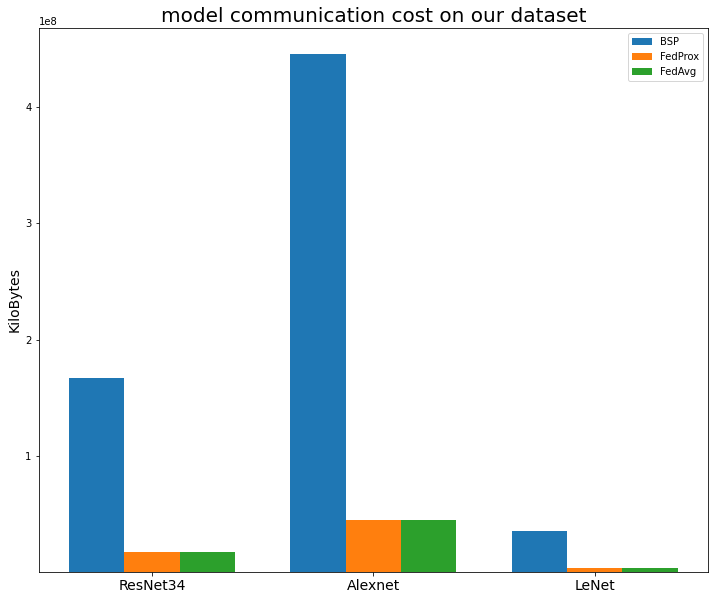

In [5]:
def bar_plot_comumication(labels, cen, fl1, fl2):
    x = np.arange(len(labels))  # the label locations
    width = 0.25 
    #plt.figure(figsize=(10, 8))

    fig, ax = plt.subplots(figsize=(12, 10))
    rects1 = ax.bar(x - width, cen, width, label='BSP')
    rects2 = ax.bar(x , fl1, width, label='FedProx')
    rects3 = ax.bar(x + width, fl2, width, label='FedAvg')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('KiloBytes',fontsize=14)
    ax.set_title('model communication cost on our dataset',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=14)

    ax.legend()
    
    plt.ylim(bottom=.6)
    
    

    _=plt.show()


ep = 25
cln = 6
frackl = 4
btchnr = 1000
cen = [83332*btchnr*2,222954*btchnr*2,17587*btchnr*2] 
#fl1 = [list(acc_dic.values())[1][24]*100,list(acc_dic2.values())[1][24]*100,list(acc_dic3.values())[1][24]*100] 
fl2 = [83332*frackl*ep*2,222954*frackl*ep*2,17587*frackl*ep*2]
fl1 = [83332*frackl*ep*2,222954*frackl*ep*2,17587*frackl*ep*2]

labels = ['ResNet34', 'Alexnet', 'LeNet']
    
bar_plot_comumication(labels, cen, fl1, fl2)    

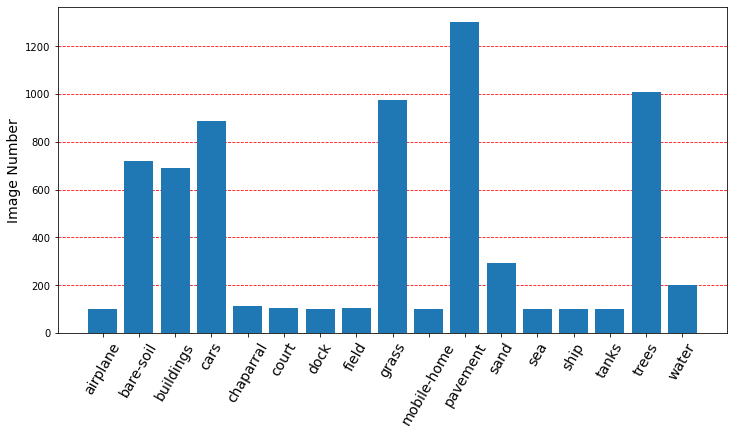

In [6]:
import pandas as pd

df = pd.read_excel ('./multilabels/LandUse_Multilabeled.xlsx')
df_label = np.array(df)
image_perlabel = np.sum(df_label[:, 1:], axis=0)
class_names = np.array(["airplane", "bare-soil", "buildings", "cars", "chaparral", "court", "dock",
                        "field", "grass", "mobile-home", "pavement", "sand", "sea", "ship", "tanks", "trees", "water"])
x = np.arange(17)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_axisbelow(True)
ax.grid(axis='y',color='red', linestyle='dashed')

plt.bar(x, image_perlabel)
ax.set_ylabel('Image Number',fontsize=14)
plt.xticks(x, class_names, rotation=60, fontsize = 14)
plt.show()

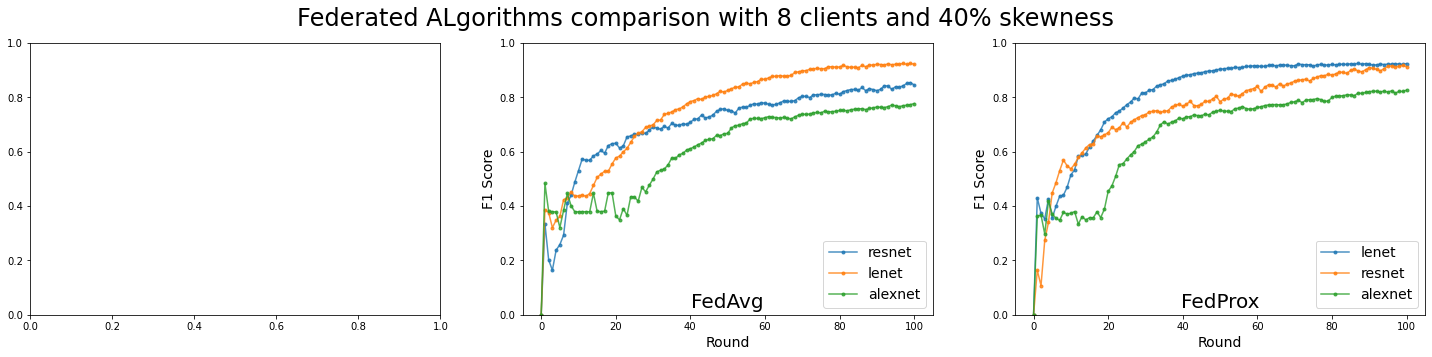

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(25,5))
fig.suptitle("Federated ALgorithms comparison with 8 clients and 40% skewness", fontsize=24)
#bsp_results ={"Lenet" : np.genfromtxt('BSP_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_15_49.csv',delimiter=',')[2,:],
#             "Resnet" : np.genfromtxt('BSP_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_18_45.csv',delimiter=',')[2,:]
#}
fedavg_results = {"resnet": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_23_38.csv',delimiter=',')[2,:],
                 "lenet": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_18_03.csv',delimiter=',')[2,:],
                 "alexnet": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_07_50.csv',delimiter=',')[2,:],}
fedprox_results = {"lenet": np.genfromtxt('FedProx_runs/FedProx_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_03_39.csv',delimiter=',')[2,:],
                 "resnet": np.genfromtxt('FedProx_runs/FedProx_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_07_17.csv',delimiter=',')[2,:],
                 "alexnet": np.genfromtxt('FedProx_runs/FedProx_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_09_18.csv',delimiter=',')[2,:],}    
#plot_curves(bsp_results, ax[0], ' BSP Learning with 8 clients, 40% skewness \n and 5 epochs per client', 0, 1, "F1 Score")
plot_curves(fedavg_results, ax[1], 'FedAvg', 0, 1, "F1 Score")
plot_curves(fedprox_results, ax[2], 'FedProx', 0, 1, "F1 Score")

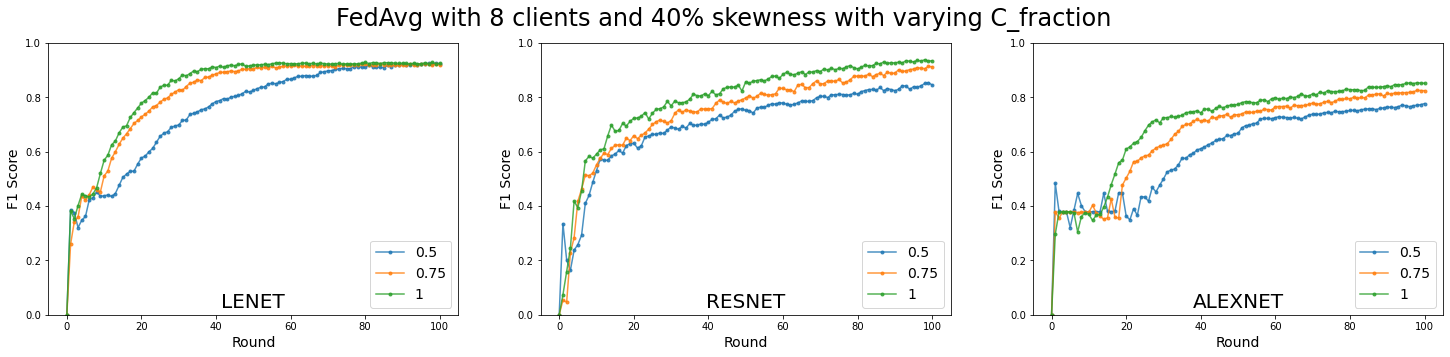

In [81]:
lenet_cfrac_results = {"0.5": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_18_03.csv',delimiter=',')[2,:],
                 "0.75": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_19_36.csv',delimiter=',')[2,:],
                 "1": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_1.0_bs_4_22_02_21_35.csv',delimiter=',')[2,:],}
resnet_cfrac_results = {"0.5": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_23_38.csv',delimiter=',')[2,:],
                 "0.75": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_23_02_02_40.csv',delimiter=',')[2,:],
                 "1": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_1.0_bs_4_23_02_06_39.csv',delimiter=',')[2,:],}
alexnet_cfrac_results = {"0.5": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_07_50.csv',delimiter=',')[2,:],
                 "0.75": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_23_02_09_37.csv',delimiter=',')[2,:],
                 "1": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_1.0_bs_4_23_02_12_02.csv',delimiter=',')[2,:],}    
fig, ax = plt.subplots(1, 3, figsize=(25,5))
fig.suptitle("FedAvg with 8 clients and 40% skewness with varying C_fraction", fontsize=24)
plot_curves(lenet_cfrac_results,ax[0],'LENET',0.0,1.0,"F1 Score")
plot_curves(resnet_cfrac_results,ax[1],'RESNET',0.0,1.0, "F1 Score")
plot_curves(alexnet_cfrac_results,ax[2],'ALEXNET',0.0,1.0, "F1 Score")


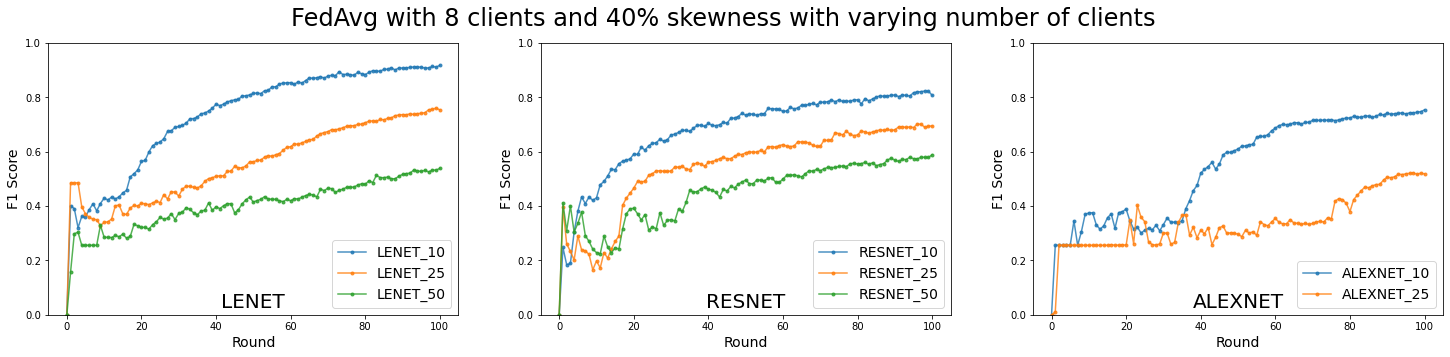

In [85]:
lenet_clients_results = {"LENET_10": np.genfromtxt('nclients_results/FedAvg_CNN_lenet_clients_10_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_15_38.csv',delimiter=',')[2,:],
                 "LENET_25": np.genfromtxt('nclients_results/FedAvg_CNN_lenet_clients_25_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_16_36.csv',delimiter=',')[2,:],
                 "LENET_50": np.genfromtxt('nclients_results/FedAvg_CNN_lenet_clients_50_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_17_35.csv',delimiter=',')[2,:],}
resnet_clients_results = {"RESNET_10": np.genfromtxt('nclients_results/FedAvg_CNN_resnet34_clients_10_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_19_39.csv',delimiter=',')[2,:],
                 "RESNET_25": np.genfromtxt('nclients_results/FedAvg_CNN_resnet34_clients_25_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_21_42.csv',delimiter=',')[2,:],
                 "RESNET_50": np.genfromtxt('nclients_results/FedAvg_CNN_resnet34_clients_50_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_23_48.csv',delimiter=',')[2,:],}
alexnet_clients_results = {"ALEXNET_10": np.genfromtxt('nclients_results/FedAvg_CNN_alexnet_clients_10_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_24_02_01_00.csv',delimiter=',')[2,:],
                 "ALEXNET_25": np.genfromtxt('nclients_results/FedAvg_CNN_alexnet_clients_25_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_24_02_02_10.csv',delimiter=',')[2,:],
                        }
fig, ax = plt.subplots(1, 3, figsize=(25,5))
fig.suptitle("FedAvg with 8 clients and 40% skewness with varying number of clients", fontsize=24)
plot_curves(lenet_clients_results,ax[0],'LENET',0.0,1.0,"F1 Score")
plot_curves(resnet_clients_results,ax[1],'RESNET',0.0,1.0, "F1 Score")
plot_curves(alexnet_clients_results,ax[2],'ALEXNET',0.0,1.0, "F1 Score")


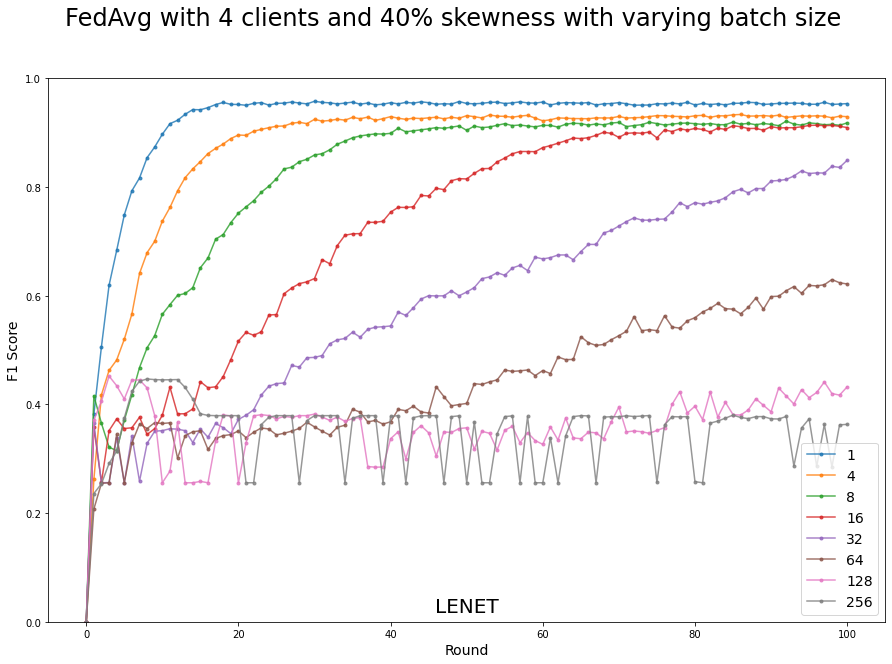

In [13]:
batch_size_comparision = {"1":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_1_26_02_01_27.csv',delimiter=',')[2,:],
                          "4":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_26_02_15_25.csv',delimiter=',')[2,:],
                          "8":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_8_25_02_23_02.csv',delimiter=',')[2,:],
                          "16":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_16_25_02_21_49.csv',delimiter=',')[2,:],
                          "32":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_32_25_02_20_41.csv',delimiter=',')[2,:],
                          "64":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_64_25_02_19_24.csv',delimiter=',')[2,:],
                          "128":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_128_26_02_12_42.csv',delimiter=',')[2,:],
                          "256":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_256_26_02_13_50.csv',delimiter=',')[2,:],}

fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle("FedAvg with 4 clients and 40% skewness with varying batch size", fontsize=24)
plot_curves(batch_size_comparision,ax,'LENET',0.0,1.0,"F1 Score")